In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
from glob import glob

In [3]:
glob('train/dog/*')[:10]

['train/dog\\dog.0.jpg',
 'train/dog\\dog.1.jpg',
 'train/dog\\dog.10.jpg',
 'train/dog\\dog.100.jpg',
 'train/dog\\dog.1000.jpg',
 'train/dog\\dog.10000.jpg',
 'train/dog\\dog.10001.jpg',
 'train/dog\\dog.10002.jpg',
 'train/dog\\dog.10003.jpg',
 'train/dog\\dog.10004.jpg']

In [4]:
import imageio
import matplotlib.pyplot as plt

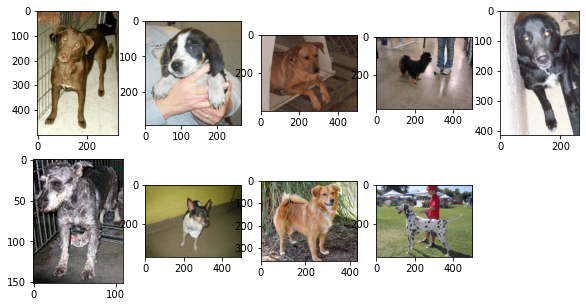

In [5]:
fig = plt.figure(figsize = (10,5))
for i in range(1,10):
  ax = plt.subplot(2,5,i)
  img= imageio.imread(glob('train/dog/*')[i])
  plt.imshow(img)

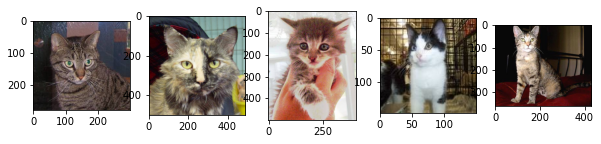

In [6]:
fig = plt.figure(figsize = (10,2))
for i in range(1,6):
  ax = plt.subplot(1,5,i)
  img= imageio.imread(glob('train/cat/*')[i])
  plt.imshow(img)

In [7]:
!mkdir val

In [9]:
import os

In [11]:
os.mkdir("val/dog")

In [12]:
os.mkdir("val/cat")

In [13]:
dog = glob('train/dog/*')
cat = glob('train/cat/*')

In [15]:
type(dog), len(dog)

(list, 12500)

In [16]:
for img in cat[-2500:]:
  os.replace(img, img.replace('train', 'val'))

In [17]:
for img in dog[-2500:]:
  os.replace(img, img.replace('train', 'val'))

In [23]:
import keras

In [31]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping

In [32]:
classifier = Sequential()

# First Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(320,320,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Second Convolution Layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2,2)))

# Flattening
classifier.add(Flatten())

# Full Connection (Hidden Layers)
classifier.add(Dense(64, activation='relu'))

# Output Layer
classifier.add(Dense(2, activation='softmax'))

In [33]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 318, 318, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 157, 157, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 78, 78, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 194688)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12460096  
_________________________________________________________________
dense_6 (Dense)              (None, 2)                

In [29]:
from keras.preprocessing.image import ImageDataGenerator

In [30]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_set = train_datagen.flow_from_directory(
        'train',
        target_size=(320, 320),
        batch_size=32,
        class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
        'val',
        target_size=(320, 320),
        batch_size=32,
        class_mode='categorical')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [36]:
train_set.class_indices

{'cat': 0, 'dog': 1}

In [37]:
classifier.fit_generator(
        train_set,
        steps_per_epoch=240,
        epochs=20,
        validation_data=validation_set,
        validation_steps=60)

Epoch 1/20
240/240 [==============================] - 1505s 6s/step - loss: 0.7814 - accuracy: 0.5918 - val_loss: 0.6988 - val_accuracy: 0.6375
Epoch 2/20
240/240 [==============================] - 1495s 6s/step - loss: 0.6339 - accuracy: 0.6520 - val_loss: 0.6568 - val_accuracy: 0.6729
Epoch 3/20
240/240 [==============================] - 1446s 6s/step - loss: 0.6067 - accuracy: 0.6743 - val_loss: 0.6030 - val_accuracy: 0.7041
Epoch 4/20
240/240 [==============================] - 1438s 6s/step - loss: 0.5723 - accuracy: 0.7001 - val_loss: 0.5016 - val_accuracy: 0.7010
Epoch 5/20
240/240 [==============================] - 1445s 6s/step - loss: 0.5646 - accuracy: 0.7085 - val_loss: 0.6133 - val_accuracy: 0.7120
Epoch 6/20
240/240 [==============================] - 1439s 6s/step - loss: 0.5391 - accuracy: 0.7271 - val_loss: 0.4738 - val_accuracy: 0.7199
Epoch 7/20
240/240 [==============================] - 1460s 6s/step - loss: 0.5381 - accuracy: 0.7328 - val_loss: 0.7132 - val_accuracy:

In [55]:
import tensorflow as tf
from keras.models import load_model
classifier.save('dogvscat1.h5')

In [58]:
test = glob('test/*')

In [59]:
test

['test\\1.jpg',
 'test\\10.jpg',
 'test\\100.jpg',
 'test\\1000.jpg',
 'test\\10000.jpg',
 'test\\10001.jpg',
 'test\\10002.jpg',
 'test\\10003.jpg',
 'test\\10004.jpg',
 'test\\10005.jpg',
 'test\\10006.jpg',
 'test\\10007.jpg',
 'test\\10008.jpg',
 'test\\10009.jpg',
 'test\\1001.jpg',
 'test\\10010.jpg',
 'test\\10011.jpg',
 'test\\10012.jpg',
 'test\\10013.jpg',
 'test\\10014.jpg',
 'test\\10015.jpg',
 'test\\10016.jpg',
 'test\\10017.jpg',
 'test\\10018.jpg',
 'test\\10019.jpg',
 'test\\1002.jpg',
 'test\\10020.jpg',
 'test\\10021.jpg',
 'test\\10022.jpg',
 'test\\10023.jpg',
 'test\\10024.jpg',
 'test\\10025.jpg',
 'test\\10026.jpg',
 'test\\10027.jpg',
 'test\\10028.jpg',
 'test\\10029.jpg',
 'test\\1003.jpg',
 'test\\10030.jpg',
 'test\\10031.jpg',
 'test\\10032.jpg',
 'test\\10033.jpg',
 'test\\10034.jpg',
 'test\\10035.jpg',
 'test\\10036.jpg',
 'test\\10037.jpg',
 'test\\10038.jpg',
 'test\\10039.jpg',
 'test\\1004.jpg',
 'test\\10040.jpg',
 'test\\10041.jpg',
 'test\\10042.

In [90]:
from PIL import Image

In [104]:
t=[]
for img in test:
    image=Image.open(img)
    x=image.resize((320,320))
    t.append(x)

In [109]:
t

[<PIL.Image.Image image mode=RGB size=320x320 at 0x2E081D88C18>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E081CE8898>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082B092B0>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26908>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26BE0>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26518>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C265C0>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26128>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26E48>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26710>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C263C8>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C264A8>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26A58>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C26A20>,
 <PIL.Image.Image image mode=RGB size=320x320 at 0x2E082C266A0>,
 <PIL.Image.Image image m

In [110]:
pred=[]
for img in t:
    p=classifier.predict(np.array(img).reshape(1,320,320,3))
    pred.append(p)

In [116]:
pred[90]

array([[1., 0.]], dtype=float32)

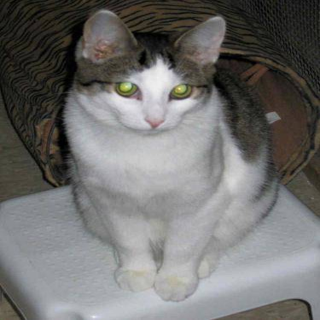

In [117]:
t[90]

In [100]:
train_set.class_indices

{'cat': 0, 'dog': 1}

In [132]:
pred[1500]

array([[0., 1.]], dtype=float32)

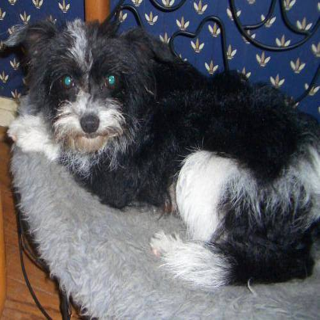

In [131]:
t[1500]